In [1]:
# load libraries and data
import sys
sys.path.append("../scripts")
import pandas as pd
import numpy as np
import seaborn as sns
import os
import ot
from tqdm import tqdm
from ChangePointDetector import ChangePointDetector
import matplotlib.pyplot as plt
data_folder = os.path.join("..", "data")
raw_filename = os.path.join(data_folder, "A_2D_1ps.dat")
shifted_filename = os.path.join(data_folder, "ADP_2D.txt")
names = ['phi', 'psi']
raw_angles = pd.read_csv(raw_filename, names=names, sep=' ')
shifted_angles = pd.read_csv(shifted_filename, names=names, sep=' ')
phi, psi = pd.DataFrame(), pd.DataFrame()
phi['shifted'] = shifted_angles['phi']
phi['raw'] = raw_angles['phi']
psi['shifted'] = shifted_angles['psi']
psi['raw'] = raw_angles['psi']

In [113]:
a = np.full((10,1), 1/10)
print(a)
mu = shifted_angles[0:10].to_numpy()[:,0]
nu = shifted_angles[11:21].to_numpy()[:,0]
mu = np.array([mu])
nu = np.array([nu])
print(mu)
print(nu)
ot.bregman.empirical_sinkhorn2(mu,nu,0.01, a=a, b=a, verbose=True)

[[0.1]
 [0.1]
 [0.1]
 [0.1]
 [0.1]
 [0.1]
 [0.1]
 [0.1]
 [0.1]
 [0.1]]
[[-144.073 -163.783 -150.995 -143.728 -135.073 -145.006 -154.056 -157.427
   -73.803  -97.617]]
[[ -72.05   -76.628  -92.181  -77.877  -74.635 -115.973  -44.156  -70.493
   -86.236  -92.463]]


ValueError: shapes (1,1) and (10,1) not aligned: 1 (dim 1) != 10 (dim 0)

In [107]:
# computing change point candidates for data
joint_dists, phi_dists, psi_dists = [], [], []
epsilon = 0.01
w = 25
N = len(shifted_angles)
for t in tqdm(range(w, N - w)):
    mu_lo, mu_hi = t - w, t
    nu_lo, nu_hi = t, t + w
    mu = shifted_angles[mu_lo:mu_hi].to_numpy()
    nu = shifted_angles[nu_lo:nu_hi].to_numpy()
    joint_dists.append(ot.bregman.empirical_sinkhorn2(mu, nu, epsilon))
    mu_phi = np.array([mu[:, 0]])
    nu_phi = np.array([nu[:, 0]])
    mu_psi = np.array([mu[:, 1]])
    nu_psi = np.array([nu[:, 1]])
    phi_dists.append(ot.bregman.empirical_sinkhorn2(mu_phi, nu_phi, epsilon))
    psi_dists.append(ot.bregman.empirical_sinkhorn2(mu_psi, nu_psi, epsilon))

  0% 0/199950 [00:00<?, ?it/s]

  0% 243/199950 [00:00<01:22, 2423.43it/s]

  0% 510/199950 [00:00<01:17, 2566.03it/s]

  0% 784/199950 [00:00<01:15, 2643.81it/s]

  1% 1061/199950 [00:00<01:13, 2691.87it/s]

  1% 1344/199950 [00:00<01:12, 2736.69it/s]

  1% 1620/199950 [00:00<01:12, 2740.16it/s]

  1% 1902/199950 [00:00<01:11, 2763.46it/s]

  1% 2183/199950 [00:00<01:11, 2776.02it/s]

  1% 2465/199950 [00:00<01:10, 2788.74it/s]

  1% 2744/199950 [00:01<01:10, 2780.99it/s]

  2% 3023/199950 [00:01<01:10, 2782.49it/s]

  2% 3302/199950 [00:01<01:10, 2773.06it/s]

  2% 3583/199950 [00:01<01:10, 2783.98it/s]

  2% 3876/199950 [00:01<01:09, 2826.57it/s]

  2% 4159/199950 [00:01<01:09, 2800.74it/s]

  2% 4440/199950 [00:01<01:10, 2779.60it/s]

  2% 4719/199950 [00:01<01:10, 2766.13it/s]

  3% 5000/199950 [00:01<01:10, 2778.02it/s]

  3% 5279/199950 [00:01<01:10, 2780.10it/s]

  3% 5558/199950 [00:02<01:09, 2782.20it/s]

  3% 5841/199950 [00:02<01:09, 2793.95it/s]

  3% 6121/199950 [00:02<01:09, 2774.03it/s]

  3% 6402/199950 [00:02<01:09, 2781.48it/s]

  3% 6683/199950 [00:02<01:09, 2787.92it/s]

  3% 6967/199950 [00:02<01:08, 2801.50it/s]

  4% 7253/199950 [00:02<01:08, 2817.58it/s]

  4% 7535/199950 [00:02<01:08, 2808.17it/s]

  4% 7816/199950 [00:02<01:08, 2800.85it/s]

  4% 8097/199950 [00:02<01:09, 2768.54it/s]

  4% 8374/199950 [00:03<01:09, 2757.08it/s]

  4% 8650/199950 [00:03<01:09, 2750.77it/s]

  4% 8926/199950 [00:03<01:09, 2738.58it/s]

  5% 9200/199950 [00:03<01:12, 2624.36it/s]

  5% 9464/199950 [00:03<01:18, 2440.49it/s]

  5% 9711/199950 [00:03<01:26, 2201.59it/s]

  5% 9982/199950 [00:03<01:21, 2334.31it/s]

  5% 10229/199950 [00:03<01:20, 2368.75it/s]

  5% 10471/199950 [00:03<01:24, 2247.43it/s]

  5% 10700/199950 [00:04<01:28, 2128.48it/s]

  5% 10921/199950 [00:04<01:27, 2149.53it/s]

  6% 11139/199950 [00:04<01:31, 2054.75it/s]

  6% 11347/199950 [00:04<01:34, 1999.24it/s]

  6% 11572/199950 [00:04<01:31, 2065.85it/s]

  6% 11781/199950 [00:04<01:34, 2001.08it/s]

  6% 11986/199950 [00:04<01:33, 2013.13it/s]

  6% 12189/199950 [00:04<01:47, 1750.23it/s]

  6% 12371/199950 [00:04<01:49, 1711.29it/s]

  6% 12547/199950 [00:05<01:49, 1711.39it/s]

  6% 12722/199950 [00:05<01:59, 1573.15it/s]

  6% 12883/199950 [00:05<02:00, 1550.82it/s]

  7% 13101/199950 [00:05<01:48, 1717.67it/s]

  7% 13296/199950 [00:05<01:44, 1779.83it/s]

  7% 13477/199950 [00:05<02:00, 1550.92it/s]

  7% 13639/199950 [00:05<02:01, 1531.40it/s]

  7% 13797/199950 [00:05<02:05, 1483.21it/s]

  7% 14007/199950 [00:05<01:52, 1647.73it/s]

  7% 14176/199950 [00:06<01:56, 1592.71it/s]

  7% 14339/199950 [00:06<01:58, 1571.44it/s]

  7% 14582/199950 [00:06<01:42, 1809.34it/s]

  7% 14850/199950 [00:06<01:30, 2055.02it/s]

  8% 15060/199950 [00:06<01:31, 2021.11it/s]

  8% 15265/199950 [00:06<01:37, 1893.88it/s]

  8% 15468/199950 [00:06<01:35, 1930.90it/s]

  8% 15695/199950 [00:06<01:30, 2025.70it/s]

  8% 15937/199950 [00:06<01:26, 2138.22it/s]

  8% 16153/199950 [00:07<01:28, 2074.86it/s]

  8% 16372/199950 [00:07<01:27, 2104.28it/s]

  8% 16584/199950 [00:07<01:31, 1993.88it/s]

  8% 16840/199950 [00:07<01:25, 2147.40it/s]

  9% 17057/199950 [00:07<02:09, 1408.52it/s]

  9% 17274/199950 [00:07<01:56, 1568.36it/s]

  9% 17480/199950 [00:07<01:48, 1676.51it/s]

  9% 17672/199950 [00:08<02:19, 1307.86it/s]

  9% 17832/199950 [00:08<02:26, 1245.52it/s]

  9% 17977/199950 [00:08<02:28, 1226.91it/s]

  9% 18113/199950 [00:08<02:55, 1038.65it/s]

  9% 18257/199950 [00:08<02:41, 1123.15it/s]

  9% 18392/199950 [00:08<02:34, 1173.43it/s]

  9% 18595/199950 [00:08<02:10, 1385.42it/s]

  9% 18846/199950 [00:08<01:47, 1678.67it/s]

 10% 19027/199950 [00:09<02:00, 1500.55it/s]

 10% 19236/199950 [00:09<01:49, 1649.30it/s]

 10% 19498/199950 [00:09<01:34, 1906.28it/s]

 10% 19767/199950 [00:09<01:24, 2121.57it/s]

 10% 20012/199950 [00:09<01:21, 2213.56it/s]

 10% 20274/199950 [00:09<01:17, 2329.18it/s]

 10% 20513/199950 [00:09<01:16, 2345.34it/s]

 10% 20752/199950 [00:09<01:17, 2322.20it/s]

 11% 21020/199950 [00:09<01:13, 2426.60it/s]

 11% 21284/199950 [00:10<01:11, 2487.54it/s]

 11% 21535/199950 [00:10<01:12, 2472.15it/s]

 11% 21792/199950 [00:10<01:11, 2498.82it/s]

 11% 22053/199950 [00:10<01:10, 2528.86it/s]

 11% 22307/199950 [00:10<01:11, 2483.60it/s]

 11% 22556/199950 [00:10<01:14, 2385.98it/s]

 11% 22796/199950 [00:10<01:17, 2297.25it/s]

 12% 23048/199950 [00:10<01:14, 2359.74it/s]

 12% 23328/199950 [00:10<01:11, 2485.04it/s]

 12% 23606/199950 [00:10<01:08, 2570.20it/s]

 12% 23874/199950 [00:11<01:07, 2601.55it/s]

 12% 24144/199950 [00:11<01:06, 2629.03it/s]

 12% 24408/199950 [00:11<01:13, 2402.11it/s]

 12% 24656/199950 [00:11<01:12, 2422.04it/s]

 12% 24919/199950 [00:11<01:10, 2478.82it/s]

 13% 25179/199950 [00:11<01:09, 2512.72it/s]

 13% 25452/199950 [00:11<01:07, 2575.97it/s]

 13% 25724/199950 [00:11<01:06, 2617.60it/s]

 13% 25987/199950 [00:11<01:11, 2431.54it/s]

 13% 26235/199950 [00:12<01:11, 2443.17it/s]

 13% 26487/199950 [00:12<01:10, 2464.90it/s]

 13% 26767/199950 [00:12<01:07, 2561.67it/s]

 14% 27037/199950 [00:12<01:06, 2598.02it/s]

 14% 27298/199950 [00:12<01:08, 2502.59it/s]

 14% 27564/199950 [00:12<01:07, 2546.00it/s]

 14% 27842/199950 [00:12<01:05, 2611.53it/s]

 14% 28111/199950 [00:12<01:05, 2633.57it/s]

 14% 28385/199950 [00:12<01:04, 2663.15it/s]

 14% 28664/199950 [00:12<01:03, 2699.54it/s]

 14% 28935/199950 [00:13<01:04, 2649.28it/s]

 15% 29201/199950 [00:13<01:06, 2566.72it/s]

 15% 29459/199950 [00:13<01:08, 2504.32it/s]

 15% 29739/199950 [00:13<01:05, 2588.47it/s]

 15% 30009/199950 [00:13<01:04, 2620.67it/s]

 15% 30272/199950 [00:13<01:08, 2493.89it/s]

 15% 30523/199950 [00:13<01:09, 2422.42it/s]

 15% 30767/199950 [00:13<01:12, 2331.25it/s]

 16% 31013/199950 [00:13<01:11, 2366.05it/s]

 16% 31282/199950 [00:14<01:08, 2457.96it/s]

 16% 31560/199950 [00:14<01:06, 2550.17it/s]

 16% 31817/199950 [00:14<01:06, 2520.61it/s]

 16% 32070/199950 [00:14<01:07, 2490.01it/s]

 16% 32320/199950 [00:14<01:07, 2473.75it/s]

 16% 32593/199950 [00:14<01:05, 2546.79it/s]

 16% 32873/199950 [00:14<01:03, 2620.45it/s]

 17% 33136/199950 [00:14<01:03, 2621.92it/s]

 17% 33399/199950 [00:14<01:09, 2382.48it/s]

 17% 33674/199950 [00:14<01:06, 2484.46it/s]

 17% 33927/199950 [00:15<01:09, 2397.11it/s]

 17% 34170/199950 [00:15<01:09, 2381.63it/s]

 17% 34411/199950 [00:15<01:16, 2159.31it/s]

 17% 34657/199950 [00:15<01:13, 2239.32it/s]

 17% 34908/199950 [00:15<01:11, 2312.91it/s]

 18% 35143/199950 [00:15<01:13, 2232.25it/s]

 18% 35370/199950 [00:15<01:16, 2149.53it/s]

 18% 35633/199950 [00:15<01:12, 2281.64it/s]

 18% 35869/199950 [00:15<01:11, 2302.84it/s]

 18% 36147/199950 [00:16<01:07, 2440.12it/s]

 18% 36420/199950 [00:16<01:04, 2522.83it/s]

 18% 36686/199950 [00:16<01:03, 2563.11it/s]

 18% 36975/199950 [00:16<01:01, 2658.32it/s]

 19% 37243/199950 [00:16<01:01, 2663.35it/s]

 19% 37523/199950 [00:16<01:00, 2701.44it/s]

 19% 37804/199950 [00:16<00:59, 2731.31it/s]

 19% 38089/199950 [00:16<00:58, 2765.01it/s]

 19% 38367/199950 [00:16<00:58, 2768.28it/s]

 19% 38645/199950 [00:16<00:59, 2688.47it/s]

 19% 38919/199950 [00:17<00:59, 2702.37it/s]

 20% 39193/199950 [00:17<00:59, 2711.31it/s]

 20% 39465/199950 [00:17<01:01, 2601.88it/s]

 20% 39727/199950 [00:17<01:02, 2574.35it/s]

 20% 39986/199950 [00:17<01:04, 2496.83it/s]

 20% 40246/199950 [00:17<01:03, 2524.67it/s]

 20% 40510/199950 [00:17<01:02, 2557.91it/s]

 20% 40786/199950 [00:17<01:00, 2614.12it/s]

 21% 41048/199950 [00:17<01:06, 2390.21it/s]

 21% 41291/199950 [00:18<01:07, 2357.10it/s]

 21% 41557/199950 [00:18<01:04, 2440.85it/s]

 21% 41815/199950 [00:18<01:03, 2480.45it/s]

 21% 42094/199950 [00:18<01:01, 2568.64it/s]

 21% 42371/199950 [00:18<01:00, 2625.42it/s]

 21% 42641/199950 [00:18<00:59, 2645.87it/s]

 21% 42915/199950 [00:18<00:58, 2671.90it/s]

 22% 43183/199950 [00:18<00:59, 2654.99it/s]

 22% 43449/199950 [00:18<01:00, 2579.22it/s]

 22% 43708/199950 [00:18<01:02, 2508.36it/s]

 22% 43987/199950 [00:19<01:00, 2587.79it/s]

 22% 44267/199950 [00:19<00:58, 2648.28it/s]

 22% 44536/199950 [00:19<00:58, 2658.30it/s]

 22% 44822/199950 [00:19<00:57, 2716.05it/s]

 23% 45095/199950 [00:19<00:57, 2703.41it/s]

 23% 45377/199950 [00:19<00:56, 2735.63it/s]

 23% 45662/199950 [00:19<00:55, 2767.19it/s]

 23% 45947/199950 [00:19<00:55, 2790.75it/s]

 23% 46230/199950 [00:19<00:54, 2801.79it/s]

 23% 46512/199950 [00:19<00:54, 2807.12it/s]

 23% 46793/199950 [00:20<00:55, 2784.05it/s]

 24% 47073/199950 [00:20<00:54, 2788.78it/s]

 24% 47357/199950 [00:20<00:54, 2802.85it/s]

 24% 47640/199950 [00:20<00:54, 2809.14it/s]

 24% 47921/199950 [00:20<00:54, 2774.79it/s]

 24% 48199/199950 [00:20<00:55, 2744.23it/s]

 24% 48474/199950 [00:20<00:55, 2721.24it/s]

 24% 48747/199950 [00:20<00:55, 2712.77it/s]

 25% 49023/199950 [00:20<00:55, 2725.34it/s]

 25% 49297/199950 [00:20<00:55, 2728.41it/s]

 25% 49571/199950 [00:21<00:55, 2730.67it/s]

 25% 49845/199950 [00:21<00:56, 2669.25it/s]

 25% 50113/199950 [00:21<00:58, 2550.60it/s]

 25% 50370/199950 [00:21<00:59, 2527.95it/s]

 25% 50645/199950 [00:21<00:57, 2589.08it/s]

 25% 50926/199950 [00:21<00:56, 2651.91it/s]

 26% 51205/199950 [00:21<00:55, 2690.21it/s]

 26% 51475/199950 [00:21<00:55, 2672.99it/s]

 26% 51759/199950 [00:21<00:54, 2720.20it/s]

 26% 52043/199950 [00:21<00:53, 2753.85it/s]

 26% 52323/199950 [00:22<00:53, 2764.72it/s]

 26% 52609/199950 [00:22<00:52, 2792.95it/s]

 26% 52889/199950 [00:22<00:52, 2785.52it/s]

 27% 53175/199950 [00:22<00:52, 2805.23it/s]

 27% 53456/199950 [00:22<00:52, 2778.20it/s]

 27% 53734/199950 [00:22<00:52, 2767.94it/s]

 27% 54021/199950 [00:22<00:52, 2795.12it/s]

 27% 54301/199950 [00:22<00:52, 2787.72it/s]

 27% 54580/199950 [00:22<00:52, 2772.85it/s]

 27% 54863/199950 [00:23<00:52, 2789.48it/s]

 28% 55142/199950 [00:23<00:51, 2786.64it/s]

 28% 55422/199950 [00:23<00:51, 2790.60it/s]

 28% 55703/199950 [00:23<00:51, 2793.82it/s]

 28% 55983/199950 [00:23<00:51, 2794.07it/s]

 28% 56266/199950 [00:23<00:51, 2802.93it/s]

 28% 56547/199950 [00:23<00:51, 2774.95it/s]

 28% 56832/199950 [00:23<00:51, 2794.71it/s]

 29% 57113/199950 [00:23<00:51, 2796.24it/s]

 29% 57397/199950 [00:23<00:50, 2807.21it/s]

 29% 57682/199950 [00:24<00:50, 2818.32it/s]

 29% 57966/199950 [00:24<00:50, 2823.70it/s]

 29% 58249/199950 [00:24<00:50, 2817.38it/s]

 29% 58531/199950 [00:24<00:50, 2815.84it/s]

 29% 58815/199950 [00:24<00:50, 2822.24it/s]

 30% 59098/199950 [00:24<00:50, 2791.87it/s]

 30% 59381/199950 [00:24<00:50, 2802.07it/s]

 30% 59665/199950 [00:24<00:49, 2810.75it/s]

 30% 59947/199950 [00:24<00:49, 2808.78it/s]

 30% 60231/199950 [00:24<00:49, 2816.98it/s]

 30% 60516/199950 [00:25<00:49, 2825.34it/s]

 30% 60799/199950 [00:25<00:49, 2825.69it/s]

 31% 61086/199950 [00:25<00:48, 2836.85it/s]

 31% 61370/199950 [00:25<00:49, 2808.85it/s]

 31% 61651/199950 [00:25<00:49, 2796.93it/s]

 31% 61931/199950 [00:25<00:49, 2788.79it/s]

 31% 62210/199950 [00:25<00:49, 2781.28it/s]

 31% 62494/199950 [00:25<00:49, 2797.02it/s]

 31% 62777/199950 [00:25<00:48, 2806.78it/s]

 32% 63058/199950 [00:25<00:49, 2771.79it/s]

 32% 63336/199950 [00:26<00:51, 2660.66it/s]

 32% 63604/199950 [00:26<00:51, 2628.70it/s]

 32% 63883/199950 [00:26<00:50, 2674.77it/s]

 32% 64162/199950 [00:26<00:50, 2708.39it/s]

 32% 64434/199950 [00:26<00:50, 2693.92it/s]

 32% 64720/199950 [00:26<00:49, 2740.30it/s]

 33% 65003/199950 [00:26<00:48, 2764.42it/s]

 33% 65285/199950 [00:26<00:48, 2779.86it/s]

 33% 65565/199950 [00:26<00:48, 2783.84it/s]

 33% 65852/199950 [00:26<00:47, 2809.22it/s]

 33% 66134/199950 [00:27<00:47, 2809.93it/s]

 33% 66416/199950 [00:27<00:49, 2710.64it/s]

 33% 66689/199950 [00:27<00:49, 2713.06it/s]

 33% 66967/199950 [00:27<00:48, 2728.24it/s]

 34% 67241/199950 [00:27<00:48, 2713.53it/s]

 34% 67517/199950 [00:27<00:48, 2724.75it/s]

 34% 67797/199950 [00:27<00:48, 2745.86it/s]

 34% 68072/199950 [00:27<00:49, 2649.79it/s]

 34% 68338/199950 [00:27<00:50, 2582.62it/s]

 34% 68598/199950 [00:27<00:50, 2581.52it/s]

 34% 68886/199950 [00:28<00:49, 2665.89it/s]

 35% 69173/199950 [00:28<00:47, 2725.70it/s]

 35% 69450/199950 [00:28<00:47, 2737.94it/s]

 35% 69733/199950 [00:28<00:47, 2764.83it/s]

 35% 70010/199950 [00:28<00:47, 2757.96it/s]

 35% 70296/199950 [00:28<00:46, 2786.88it/s]

 35% 70580/199950 [00:28<00:46, 2800.82it/s]

 35% 70864/199950 [00:28<00:45, 2810.80it/s]

 36% 71146/199950 [00:28<00:46, 2788.00it/s]

 36% 71429/199950 [00:29<00:45, 2796.44it/s]

 36% 71710/199950 [00:29<00:45, 2799.57it/s]

 36% 71991/199950 [00:29<00:46, 2726.96it/s]

 36% 72265/199950 [00:29<00:48, 2635.99it/s]

 36% 72540/199950 [00:29<00:47, 2667.29it/s]

 36% 72818/199950 [00:29<00:47, 2699.49it/s]

 37% 73092/199950 [00:29<00:46, 2709.76it/s]

 37% 73376/199950 [00:29<00:46, 2745.96it/s]

 37% 73651/199950 [00:29<00:46, 2721.07it/s]

 37% 73924/199950 [00:29<00:49, 2564.48it/s]

 37% 74195/199950 [00:30<00:48, 2604.49it/s]

 37% 74474/199950 [00:30<00:47, 2655.97it/s]

 37% 74741/199950 [00:30<00:48, 2575.77it/s]

 38% 75021/199950 [00:30<00:47, 2639.27it/s]

 38% 75295/199950 [00:30<00:46, 2666.90it/s]

 38% 75575/199950 [00:30<00:45, 2704.51it/s]

 38% 75857/199950 [00:30<00:45, 2738.51it/s]

 38% 76132/199950 [00:30<00:45, 2724.60it/s]

 38% 76405/199950 [00:30<00:45, 2700.39it/s]

 38% 76686/199950 [00:30<00:45, 2730.45it/s]

 38% 76967/199950 [00:31<00:44, 2751.92it/s]

 39% 77253/199950 [00:31<00:44, 2783.60it/s]

 39% 77536/199950 [00:31<00:43, 2797.05it/s]

 39% 77820/199950 [00:31<00:43, 2807.31it/s]

 39% 78101/199950 [00:31<00:44, 2728.82it/s]

 39% 78375/199950 [00:31<00:45, 2695.80it/s]

 39% 78657/199950 [00:31<00:44, 2729.68it/s]

 39% 78945/199950 [00:31<00:43, 2772.97it/s]

 40% 79223/199950 [00:31<00:44, 2739.20it/s]

 40% 79501/199950 [00:31<00:43, 2749.92it/s]

 40% 79791/199950 [00:32<00:43, 2792.29it/s]

 40% 80072/199950 [00:32<00:42, 2797.12it/s]

 40% 80354/199950 [00:32<00:42, 2802.06it/s]

 40% 80638/199950 [00:32<00:42, 2812.60it/s]

 40% 80920/199950 [00:32<00:42, 2796.21it/s]

 41% 81200/199950 [00:32<00:42, 2791.57it/s]

 41% 81480/199950 [00:32<00:42, 2756.68it/s]

 41% 81758/199950 [00:32<00:42, 2762.55it/s]

 41% 82035/199950 [00:32<00:43, 2736.13it/s]

 41% 82320/199950 [00:32<00:42, 2769.52it/s]

 41% 82598/199950 [00:33<00:43, 2714.69it/s]

 41% 82870/199950 [00:33<00:43, 2666.07it/s]

 42% 83147/199950 [00:33<00:43, 2694.09it/s]

 42% 83431/199950 [00:33<00:42, 2736.42it/s]

 42% 83710/199950 [00:33<00:42, 2751.21it/s]

 42% 83986/199950 [00:33<00:42, 2726.31it/s]

 42% 84269/199950 [00:33<00:41, 2756.62it/s]

 42% 84553/199950 [00:33<00:41, 2780.00it/s]

 42% 84836/199950 [00:33<00:41, 2794.32it/s]

 43% 85117/199950 [00:34<00:41, 2796.53it/s]

 43% 85405/199950 [00:34<00:40, 2818.72it/s]

 43% 85689/199950 [00:34<00:40, 2824.21it/s]

 43% 85972/199950 [00:34<00:41, 2759.09it/s]

 43% 86253/199950 [00:34<00:41, 2771.79it/s]

 43% 86531/199950 [00:34<00:40, 2766.93it/s]

 43% 86808/199950 [00:34<00:41, 2736.35it/s]

 44% 87082/199950 [00:34<00:41, 2717.49it/s]

 44% 87366/199950 [00:34<00:40, 2751.68it/s]

 44% 87643/199950 [00:34<00:40, 2755.36it/s]

 44% 87924/199950 [00:35<00:40, 2769.31it/s]

 44% 88211/199950 [00:35<00:39, 2798.76it/s]

 44% 88491/199950 [00:35<00:40, 2754.61it/s]

 44% 88771/199950 [00:35<00:40, 2767.46it/s]

 45% 89049/199950 [00:35<00:40, 2770.62it/s]

 45% 89327/199950 [00:35<00:39, 2771.87it/s]

 45% 89606/199950 [00:35<00:39, 2776.68it/s]

 45% 89890/199950 [00:35<00:39, 2793.08it/s]

 45% 90173/199950 [00:35<00:39, 2801.43it/s]

 45% 90454/199950 [00:35<00:39, 2802.64it/s]

 45% 90735/199950 [00:36<00:40, 2674.47it/s]

 46% 91004/199950 [00:36<00:41, 2642.91it/s]

 46% 91283/199950 [00:36<00:40, 2681.89it/s]

 46% 91559/199950 [00:36<00:40, 2702.17it/s]

 46% 91834/199950 [00:36<00:39, 2714.20it/s]

 46% 92114/199950 [00:36<00:39, 2739.52it/s]

 46% 92396/199950 [00:36<00:38, 2761.33it/s]

 46% 92677/199950 [00:36<00:38, 2775.12it/s]

 46% 92960/199950 [00:36<00:38, 2789.49it/s]

 47% 93248/199950 [00:36<00:37, 2816.19it/s]

 47% 93533/199950 [00:37<00:37, 2823.85it/s]

 47% 93818/199950 [00:37<00:37, 2829.83it/s]

 47% 94105/199950 [00:37<00:37, 2839.45it/s]

 47% 94389/199950 [00:37<00:37, 2834.71it/s]

 47% 94673/199950 [00:37<00:37, 2785.16it/s]

 47% 94953/199950 [00:37<00:37, 2789.13it/s]

 48% 95233/199950 [00:37<00:37, 2786.79it/s]

 48% 95512/199950 [00:37<00:37, 2778.07it/s]

 48% 95798/199950 [00:37<00:37, 2799.33it/s]

 48% 96078/199950 [00:37<00:39, 2660.52it/s]

 48% 96346/199950 [00:38<00:39, 2637.02it/s]

 48% 96629/199950 [00:38<00:38, 2691.35it/s]

 48% 96912/199950 [00:38<00:37, 2731.56it/s]

 49% 97193/199950 [00:38<00:37, 2752.48it/s]

 49% 97469/199950 [00:38<00:37, 2731.74it/s]

 49% 97751/199950 [00:38<00:37, 2694.56it/s]

 49% 98023/199950 [00:38<00:37, 2701.71it/s]

 49% 98303/199950 [00:38<00:37, 2730.25it/s]

 49% 98581/199950 [00:38<00:36, 2744.51it/s]

 49% 98863/199950 [00:39<00:36, 2765.89it/s]

 50% 99144/199950 [00:39<00:36, 2776.60it/s]

 50% 99428/199950 [00:39<00:35, 2793.07it/s]

 50% 99713/199950 [00:39<00:35, 2808.81it/s]

 50% 99994/199950 [00:39<00:35, 2793.56it/s]

 50% 100274/199950 [00:39<00:36, 2756.46it/s]

 50% 100555/199950 [00:39<00:35, 2770.51it/s]

 50% 100836/199950 [00:39<00:35, 2781.76it/s]

 51% 101117/199950 [00:39<00:35, 2789.99it/s]

 51% 101400/199950 [00:39<00:35, 2801.05it/s]

 51% 101682/199950 [00:40<00:35, 2806.35it/s]

 51% 101965/199950 [00:40<00:34, 2813.02it/s]

 51% 102252/199950 [00:40<00:34, 2829.44it/s]

 51% 102535/199950 [00:40<00:34, 2817.63it/s]

 51% 102822/199950 [00:40<00:34, 2833.17it/s]

 52% 103106/199950 [00:40<00:34, 2813.57it/s]

 52% 103390/199950 [00:40<00:34, 2820.28it/s]

 52% 103678/199950 [00:40<00:33, 2836.77it/s]

 52% 103962/199950 [00:40<00:33, 2826.77it/s]

 52% 104245/199950 [00:40<00:33, 2823.95it/s]

 52% 104529/199950 [00:41<00:33, 2826.49it/s]

 52% 104812/199950 [00:41<00:33, 2821.17it/s]

 53% 105099/199950 [00:41<00:33, 2833.19it/s]

 53% 105389/199950 [00:41<00:33, 2850.39it/s]

 53% 105675/199950 [00:41<00:33, 2841.03it/s]

 53% 105960/199950 [00:41<00:33, 2815.45it/s]

 53% 106242/199950 [00:41<00:34, 2747.63it/s]

 53% 106518/199950 [00:41<00:33, 2749.89it/s]

 53% 106805/199950 [00:41<00:33, 2784.43it/s]

 54% 107086/199950 [00:41<00:33, 2791.22it/s]

 54% 107372/199950 [00:42<00:32, 2809.25it/s]

 54% 107654/199950 [00:42<00:34, 2653.59it/s]

 54% 107922/199950 [00:42<00:34, 2646.51it/s]

 54% 108188/199950 [00:42<00:35, 2617.80it/s]

 54% 108451/199950 [00:42<00:36, 2476.34it/s]

 54% 108701/199950 [00:42<00:40, 2264.37it/s]

 54% 108932/199950 [00:42<00:44, 2051.10it/s]

 55% 109143/199950 [00:42<00:44, 2035.33it/s]

 55% 109351/199950 [00:42<00:45, 1995.38it/s]

 55% 109639/199950 [00:43<00:40, 2231.58it/s]

 55% 109903/199950 [00:43<00:38, 2342.76it/s]

 55% 110142/199950 [00:43<00:38, 2309.94it/s]

 55% 110376/199950 [00:43<00:38, 2298.86it/s]

 55% 110608/199950 [00:43<00:39, 2243.29it/s]

 55% 110857/199950 [00:43<00:38, 2313.61it/s]

 56% 111090/199950 [00:43<00:38, 2301.60it/s]

 56% 111322/199950 [00:43<00:40, 2193.51it/s]

 56% 111543/199950 [00:43<00:41, 2152.61it/s]

 56% 111760/199950 [00:44<00:41, 2138.50it/s]

 56% 112009/199950 [00:44<00:39, 2237.20it/s]

 56% 112234/199950 [00:44<01:00, 1450.37it/s]

 56% 112415/199950 [00:44<00:58, 1504.25it/s]

 56% 112637/199950 [00:44<00:52, 1665.43it/s]

 56% 112895/199950 [00:44<00:46, 1890.03it/s]

 57% 113166/199950 [00:44<00:41, 2102.24it/s]

 57% 113441/199950 [00:44<00:37, 2277.20it/s]

 57% 113722/199950 [00:45<00:35, 2424.80it/s]

 57% 114003/199950 [00:45<00:33, 2532.57it/s]

 57% 114287/199950 [00:45<00:32, 2619.34it/s]

 57% 114562/199950 [00:45<00:32, 2655.35it/s]

 57% 114842/199950 [00:45<00:31, 2696.74it/s]

 58% 115117/199950 [00:45<00:31, 2711.85it/s]

 58% 115391/199950 [00:45<00:31, 2702.40it/s]

 58% 115663/199950 [00:45<00:31, 2642.95it/s]

 58% 115929/199950 [00:45<00:33, 2509.23it/s]

 58% 116193/199950 [00:45<00:32, 2544.01it/s]

 58% 116450/199950 [00:46<00:33, 2487.65it/s]

 58% 116701/199950 [00:46<00:34, 2435.56it/s]

 58% 116946/199950 [00:46<00:34, 2435.82it/s]

 59% 117191/199950 [00:46<00:34, 2368.17it/s]

 59% 117429/199950 [00:46<00:36, 2235.01it/s]

 59% 117655/199950 [00:46<00:37, 2193.19it/s]

 59% 117908/199950 [00:46<00:35, 2285.53it/s]

 59% 118172/199950 [00:46<00:34, 2384.45it/s]

 59% 118412/199950 [00:46<00:34, 2344.60it/s]

 59% 118689/199950 [00:47<00:32, 2466.96it/s]

 59% 118941/199950 [00:47<00:32, 2481.76it/s]

 60% 119200/199950 [00:47<00:32, 2513.39it/s]

 60% 119473/199950 [00:47<00:31, 2575.94it/s]

 60% 119732/199950 [00:47<00:31, 2536.49it/s]

 60% 119987/199950 [00:47<00:33, 2411.87it/s]

 60% 120261/199950 [00:47<00:31, 2504.93it/s]

 60% 120514/199950 [00:47<00:31, 2508.90it/s]

 60% 120766/199950 [00:47<00:33, 2397.75it/s]

 61% 121008/199950 [00:47<00:33, 2371.54it/s]

 61% 121247/199950 [00:48<00:33, 2368.52it/s]

 61% 121485/199950 [00:48<00:34, 2270.80it/s]

 61% 121748/199950 [00:48<00:32, 2371.45it/s]

 61% 122022/199950 [00:48<00:31, 2475.62it/s]

 61% 122283/199950 [00:48<00:30, 2513.43it/s]

 61% 122560/199950 [00:48<00:29, 2587.00it/s]

 61% 122820/199950 [00:48<00:30, 2567.11it/s]

 62% 123078/199950 [00:48<00:31, 2468.63it/s]

 62% 123326/199950 [00:48<00:32, 2382.40it/s]

 62% 123593/199950 [00:49<00:31, 2462.42it/s]

 62% 123864/199950 [00:49<00:30, 2531.60it/s]

 62% 124119/199950 [00:49<00:30, 2505.45it/s]

 62% 124373/199950 [00:49<00:30, 2514.45it/s]

 62% 124626/199950 [00:49<00:30, 2446.10it/s]

 62% 124885/199950 [00:49<00:30, 2486.89it/s]

 63% 125142/199950 [00:49<00:29, 2511.05it/s]

 63% 125394/199950 [00:49<00:32, 2269.36it/s]

 63% 125626/199950 [00:49<00:33, 2244.88it/s]

 63% 125855/199950 [00:49<00:32, 2256.85it/s]

 63% 126137/199950 [00:50<00:30, 2415.16it/s]

 63% 126399/199950 [00:50<00:29, 2467.14it/s]

 63% 126648/199950 [00:50<00:37, 1961.31it/s]

 63% 126862/199950 [00:50<00:39, 1842.87it/s]

 64% 127059/199950 [00:50<00:47, 1545.06it/s]

 64% 127229/199950 [00:50<00:53, 1366.39it/s]

 64% 127378/199950 [00:50<00:55, 1305.58it/s]

 64% 127555/199950 [00:51<00:51, 1410.12it/s]

 64% 127705/199950 [00:51<00:53, 1348.74it/s]

 64% 127859/199950 [00:51<00:51, 1395.08it/s]

 64% 128004/199950 [00:51<00:51, 1383.72it/s]

 64% 128146/199950 [00:51<00:51, 1392.35it/s]

 64% 128358/199950 [00:51<00:44, 1592.96it/s]

 64% 128564/199950 [00:51<00:41, 1725.11it/s]

 64% 128813/199950 [00:51<00:36, 1945.06it/s]

 65% 129052/199950 [00:51<00:34, 2073.19it/s]

 65% 129262/199950 [00:52<00:34, 2040.57it/s]

 65% 129468/199950 [00:52<00:36, 1952.04it/s]

 65% 129666/199950 [00:52<00:36, 1925.36it/s]

 65% 129913/199950 [00:52<00:33, 2079.41it/s]

 65% 130130/199950 [00:52<00:33, 2105.38it/s]

 65% 130389/199950 [00:52<00:30, 2246.24it/s]

 65% 130646/199950 [00:52<00:29, 2340.58it/s]

 65% 130882/199950 [00:52<00:35, 1957.40it/s]

 66% 131089/199950 [00:52<00:38, 1805.21it/s]

 66% 131279/199950 [00:53<00:43, 1593.61it/s]

 66% 131448/199950 [00:53<00:42, 1604.10it/s]

 66% 131650/199950 [00:53<00:39, 1707.87it/s]

 66% 131874/199950 [00:53<00:36, 1848.72it/s]

 66% 132144/199950 [00:53<00:32, 2081.12it/s]

 66% 132407/199950 [00:53<00:30, 2235.12it/s]

 66% 132673/199950 [00:53<00:28, 2353.60it/s]

 66% 132913/199950 [00:53<00:31, 2148.05it/s]

 67% 133135/199950 [00:53<00:32, 2035.75it/s]

 67% 133397/199950 [00:54<00:30, 2190.83it/s]

 67% 133673/199950 [00:54<00:28, 2348.36it/s]

 67% 133952/199950 [00:54<00:26, 2472.05it/s]

 67% 134228/199950 [00:54<00:25, 2554.51it/s]

 67% 134487/199950 [00:54<00:26, 2437.52it/s]

 67% 134744/199950 [00:54<00:26, 2473.74it/s]

 68% 134994/199950 [00:54<00:26, 2436.59it/s]

 68% 135240/199950 [00:54<00:27, 2396.34it/s]

 68% 135481/199950 [00:54<00:26, 2399.12it/s]

 68% 135722/199950 [00:55<00:27, 2343.27it/s]

 68% 135958/199950 [00:55<00:27, 2346.65it/s]

 68% 136194/199950 [00:55<00:27, 2337.99it/s]

 68% 136454/199950 [00:55<00:26, 2412.18it/s]

 68% 136733/199950 [00:55<00:25, 2521.35it/s]

 69% 136986/199950 [00:55<00:27, 2301.52it/s]

 69% 137221/199950 [00:55<00:33, 1880.69it/s]

 69% 137424/199950 [00:55<00:41, 1519.89it/s]

 69% 137596/199950 [00:56<00:51, 1220.37it/s]

 69% 137784/199950 [00:56<00:46, 1347.93it/s]

 69% 138050/199950 [00:56<00:37, 1632.70it/s]

 69% 138254/199950 [00:56<00:35, 1728.21it/s]

 69% 138490/199950 [00:56<00:32, 1886.12it/s]

 69% 138696/199950 [00:56<00:34, 1795.76it/s]

 69% 138889/199950 [00:56<00:35, 1700.49it/s]

 70% 139110/199950 [00:56<00:33, 1830.03it/s]

 70% 139318/199950 [00:57<00:31, 1895.43it/s]

 70% 139515/199950 [00:57<00:31, 1894.98it/s]

 70% 139768/199950 [00:57<00:29, 2073.39it/s]

 70% 140038/199950 [00:57<00:26, 2252.51it/s]

 70% 140312/199950 [00:57<00:24, 2393.29it/s]

 70% 140580/199950 [00:57<00:23, 2476.80it/s]

 70% 140849/199950 [00:57<00:23, 2538.69it/s]

 71% 141112/199950 [00:57<00:22, 2564.41it/s]

 71% 141372/199950 [00:57<00:22, 2574.82it/s]

 71% 141651/199950 [00:57<00:22, 2638.72it/s]

 71% 141928/199950 [00:58<00:21, 2676.81it/s]

 71% 142212/199950 [00:58<00:21, 2723.31it/s]

 71% 142485/199950 [00:58<00:21, 2651.44it/s]

 71% 142751/199950 [00:58<00:22, 2553.66it/s]

 72% 143008/199950 [00:58<00:23, 2468.07it/s]

 72% 143256/199950 [00:58<00:23, 2407.41it/s]

 72% 143498/199950 [00:58<00:23, 2379.30it/s]

 72% 143737/199950 [00:58<00:23, 2351.33it/s]

 72% 144008/199950 [00:58<00:22, 2452.29it/s]

 72% 144292/199950 [00:58<00:21, 2562.28it/s]

 72% 144567/199950 [00:59<00:21, 2614.53it/s]

 72% 144830/199950 [00:59<00:22, 2499.40it/s]

 73% 145082/199950 [00:59<00:23, 2292.70it/s]

 73% 145316/199950 [00:59<00:24, 2243.68it/s]

 73% 145543/199950 [00:59<00:24, 2217.59it/s]

 73% 145767/199950 [00:59<00:26, 2061.70it/s]

 73% 145976/199950 [00:59<00:27, 1987.59it/s]

 73% 146209/199950 [00:59<00:25, 2079.78it/s]

 73% 146420/199950 [01:00<00:26, 2038.71it/s]

 73% 146665/199950 [01:00<00:24, 2153.14it/s]

 73% 146943/199950 [01:00<00:22, 2331.01it/s]

 74% 147216/199950 [01:00<00:21, 2445.78it/s]

 74% 147496/199950 [01:00<00:20, 2549.18it/s]

 74% 147766/199950 [01:00<00:20, 2593.21it/s]

 74% 148032/199950 [01:00<00:19, 2611.77it/s]

 74% 148308/199950 [01:00<00:19, 2653.91it/s]

 74% 148575/199950 [01:00<00:19, 2629.47it/s]

 74% 148839/199950 [01:00<00:19, 2609.57it/s]

 75% 149109/199950 [01:01<00:19, 2634.01it/s]

 75% 149393/199950 [01:01<00:18, 2693.39it/s]

 75% 149674/199950 [01:01<00:18, 2726.41it/s]

 75% 149961/199950 [01:01<00:18, 2768.18it/s]

 75% 150244/199950 [01:01<00:17, 2785.70it/s]

 75% 150523/199950 [01:01<00:19, 2590.24it/s]

 75% 150785/199950 [01:01<00:19, 2470.83it/s]

 76% 151061/199950 [01:01<00:19, 2550.99it/s]

 76% 151345/199950 [01:01<00:18, 2631.92it/s]

 76% 151620/199950 [01:01<00:18, 2665.66it/s]

 76% 151904/199950 [01:02<00:17, 2714.49it/s]

 76% 152183/199950 [01:02<00:17, 2734.48it/s]

 76% 152468/199950 [01:02<00:17, 2767.89it/s]

 76% 152756/199950 [01:02<00:16, 2798.42it/s]

 77% 153037/199950 [01:02<00:16, 2775.94it/s]

 77% 153315/199950 [01:02<00:16, 2757.96it/s]

 77% 153603/199950 [01:02<00:16, 2793.78it/s]

 77% 153888/199950 [01:02<00:16, 2808.71it/s]

 77% 154170/199950 [01:02<00:16, 2811.72it/s]

 77% 154454/199950 [01:02<00:16, 2818.10it/s]

 77% 154736/199950 [01:03<00:16, 2810.47it/s]

 78% 155018/199950 [01:03<00:16, 2803.32it/s]

 78% 155301/199950 [01:03<00:15, 2810.52it/s]

 78% 155586/199950 [01:03<00:15, 2820.99it/s]

 78% 155869/199950 [01:03<00:15, 2776.27it/s]

 78% 156156/199950 [01:03<00:15, 2803.16it/s]

 78% 156441/199950 [01:03<00:15, 2813.67it/s]

 78% 156723/199950 [01:03<00:15, 2815.00it/s]

 79% 157005/199950 [01:03<00:15, 2815.74it/s]

 79% 157294/199950 [01:03<00:15, 2835.66it/s]

 79% 157578/199950 [01:04<00:15, 2822.33it/s]

 79% 157861/199950 [01:04<00:14, 2812.74it/s]

 79% 158143/199950 [01:04<00:14, 2813.88it/s]

 79% 158429/199950 [01:04<00:14, 2826.00it/s]

 79% 158712/199950 [01:04<00:14, 2804.91it/s]

 80% 158994/199950 [01:04<00:14, 2806.36it/s]

 80% 159279/199950 [01:04<00:14, 2817.40it/s]

 80% 159561/199950 [01:04<00:14, 2811.77it/s]

 80% 159844/199950 [01:04<00:14, 2815.96it/s]

 80% 160128/199950 [01:04<00:14, 2823.00it/s]

 80% 160411/199950 [01:05<00:14, 2811.75it/s]

 80% 160693/199950 [01:05<00:14, 2792.90it/s]

 81% 160977/199950 [01:05<00:13, 2804.38it/s]

 81% 161261/199950 [01:05<00:13, 2812.51it/s]

 81% 161543/199950 [01:05<00:13, 2800.97it/s]

 81% 161824/199950 [01:05<00:13, 2785.47it/s]

 81% 162103/199950 [01:05<00:13, 2747.51it/s]

 81% 162384/199950 [01:05<00:13, 2763.42it/s]

 81% 162661/199950 [01:05<00:13, 2751.46it/s]

 81% 162950/199950 [01:05<00:13, 2791.64it/s]

 82% 163231/199950 [01:06<00:13, 2794.11it/s]

 82% 163511/199950 [01:06<00:13, 2685.90it/s]

 82% 163781/199950 [01:06<00:15, 2271.96it/s]

 82% 164020/199950 [01:06<00:16, 2120.06it/s]

 82% 164241/199950 [01:06<00:16, 2104.15it/s]

 82% 164521/199950 [01:06<00:15, 2287.01it/s]

 82% 164805/199950 [01:06<00:14, 2436.02it/s]

 83% 165055/199950 [01:06<00:14, 2436.95it/s]

 83% 165303/199950 [01:07<00:15, 2306.71it/s]

 83% 165539/199950 [01:07<00:14, 2320.47it/s]

 83% 165774/199950 [01:07<00:15, 2257.66it/s]

 83% 166030/199950 [01:07<00:14, 2341.13it/s]

 83% 166267/199950 [01:07<00:14, 2317.70it/s]

 83% 166501/199950 [01:07<00:14, 2298.12it/s]

 83% 166761/199950 [01:07<00:13, 2384.71it/s]

 84% 167042/199950 [01:07<00:13, 2508.45it/s]

 84% 167322/199950 [01:07<00:12, 2593.85it/s]

 84% 167583/199950 [01:08<00:15, 2087.69it/s]

 84% 167809/199950 [01:08<00:15, 2120.50it/s]

 84% 168033/199950 [01:08<00:15, 2030.10it/s]

 84% 168245/199950 [01:08<00:16, 1881.08it/s]

 84% 168441/199950 [01:08<00:17, 1813.44it/s]

 84% 168727/199950 [01:08<00:14, 2083.71it/s]

 85% 169005/199950 [01:08<00:13, 2268.88it/s]

 85% 169240/199950 [01:08<00:13, 2194.50it/s]

 85% 169465/199950 [01:08<00:14, 2149.80it/s]

 85% 169707/199950 [01:09<00:13, 2223.50it/s]

 85% 169981/199950 [01:09<00:12, 2367.67it/s]

 85% 170221/199950 [01:09<00:12, 2315.03it/s]

 85% 170455/199950 [01:09<00:12, 2283.01it/s]

 85% 170707/199950 [01:09<00:12, 2350.59it/s]

 86% 170975/199950 [01:09<00:11, 2445.86it/s]

 86% 171228/199950 [01:09<00:11, 2468.76it/s]

 86% 171507/199950 [01:09<00:11, 2561.09it/s]

 86% 171789/199950 [01:09<00:10, 2636.15it/s]

 86% 172075/199950 [01:09<00:10, 2701.25it/s]

 86% 172346/199950 [01:10<00:10, 2703.38it/s]

 86% 172633/199950 [01:10<00:09, 2753.04it/s]

 86% 172909/199950 [01:10<00:09, 2728.05it/s]

 87% 173183/199950 [01:10<00:09, 2728.24it/s]

 87% 173456/199950 [01:10<00:09, 2707.46it/s]

 87% 173737/199950 [01:10<00:09, 2735.29it/s]

 87% 174016/199950 [01:10<00:09, 2751.42it/s]

 87% 174292/199950 [01:10<00:09, 2647.42it/s]

 87% 174574/199950 [01:10<00:09, 2696.99it/s]

 87% 174845/199950 [01:10<00:09, 2615.97it/s]

 88% 175108/199950 [01:11<00:09, 2531.66it/s]

 88% 175363/199950 [01:11<00:09, 2520.09it/s]

 88% 175616/199950 [01:11<00:10, 2334.14it/s]

 88% 175853/199950 [01:11<00:10, 2324.34it/s]

 88% 176124/199950 [01:11<00:09, 2432.25it/s]

 88% 176389/199950 [01:11<00:09, 2494.38it/s]

 88% 176671/199950 [01:11<00:08, 2588.01it/s]

 88% 176950/199950 [01:11<00:08, 2646.03it/s]

 89% 177238/199950 [01:11<00:08, 2713.58it/s]

 89% 177513/199950 [01:12<00:08, 2723.31it/s]

 89% 177793/199950 [01:12<00:08, 2745.68it/s]

 89% 178069/199950 [01:12<00:08, 2719.61it/s]

 89% 178357/199950 [01:12<00:07, 2766.78it/s]

 89% 178635/199950 [01:12<00:07, 2754.65it/s]

 89% 178911/199950 [01:12<00:07, 2750.51it/s]

 90% 179187/199950 [01:12<00:07, 2752.93it/s]

 90% 179467/199950 [01:12<00:07, 2765.26it/s]

 90% 179748/199950 [01:12<00:07, 2775.27it/s]

 90% 180029/199950 [01:12<00:07, 2783.50it/s]

 90% 180308/199950 [01:13<00:07, 2757.01it/s]

 90% 180584/199950 [01:13<00:07, 2725.83it/s]

 90% 180858/199950 [01:13<00:06, 2728.87it/s]

 91% 181141/199950 [01:13<00:06, 2758.27it/s]

 91% 181417/199950 [01:13<00:06, 2748.88it/s]

 91% 181693/199950 [01:13<00:06, 2751.90it/s]

 91% 181969/199950 [01:13<00:06, 2742.16it/s]

 91% 182251/199950 [01:13<00:06, 2761.26it/s]

 91% 182530/199950 [01:13<00:06, 2768.90it/s]

 91% 182817/199950 [01:13<00:06, 2797.06it/s]

 92% 183097/199950 [01:14<00:06, 2763.79it/s]

 92% 183377/199950 [01:14<00:05, 2772.55it/s]

 92% 183655/199950 [01:14<00:05, 2767.94it/s]

 92% 183938/199950 [01:14<00:05, 2784.91it/s]

 92% 184217/199950 [01:14<00:05, 2752.84it/s]

 92% 184494/199950 [01:14<00:05, 2755.69it/s]

 92% 184778/199950 [01:14<00:05, 2779.81it/s]

 93% 185063/199950 [01:14<00:05, 2798.27it/s]

 93% 185343/199950 [01:14<00:05, 2793.84it/s]

 93% 185630/199950 [01:14<00:05, 2814.28it/s]

 93% 185912/199950 [01:15<00:05, 2788.46it/s]

 93% 186194/199950 [01:15<00:04, 2795.81it/s]

 93% 186481/199950 [01:15<00:04, 2816.34it/s]

 93% 186768/199950 [01:15<00:04, 2831.57it/s]

 94% 187052/199950 [01:15<00:04, 2817.34it/s]

 94% 187334/199950 [01:15<00:04, 2803.22it/s]

 94% 187615/199950 [01:15<00:04, 2623.76it/s]

 94% 187880/199950 [01:15<00:04, 2515.03it/s]

 94% 188161/199950 [01:15<00:04, 2596.83it/s]

 94% 188437/199950 [01:16<00:04, 2641.50it/s]

 94% 188703/199950 [01:16<00:04, 2458.01it/s]

 95% 188953/199950 [01:16<00:04, 2312.01it/s]

 95% 189193/199950 [01:16<00:04, 2335.70it/s]

 95% 189430/199950 [01:16<00:04, 2242.61it/s]

 95% 189657/199950 [01:16<00:04, 2162.40it/s]

 95% 189877/199950 [01:16<00:04, 2170.95it/s]

 95% 190152/199950 [01:16<00:04, 2333.73it/s]

 95% 190433/199950 [01:16<00:03, 2470.03it/s]

 95% 190710/199950 [01:16<00:03, 2555.70it/s]

 96% 190984/199950 [01:17<00:03, 2607.54it/s]

 96% 191269/199950 [01:17<00:03, 2676.51it/s]

 96% 191553/199950 [01:17<00:03, 2722.49it/s]

 96% 191837/199950 [01:17<00:02, 2757.14it/s]

 96% 192114/199950 [01:17<00:02, 2671.18it/s]

 96% 192388/199950 [01:17<00:02, 2689.63it/s]

 96% 192674/199950 [01:17<00:02, 2737.94it/s]

 96% 192950/199950 [01:17<00:02, 2743.04it/s]

 97% 193231/199950 [01:17<00:02, 2760.36it/s]

 97% 193510/199950 [01:18<00:02, 2768.84it/s]

 97% 193794/199950 [01:18<00:02, 2789.89it/s]

 97% 194074/199950 [01:18<00:02, 2780.63it/s]

 97% 194357/199950 [01:18<00:02, 2791.95it/s]

 97% 194637/199950 [01:18<00:01, 2730.50it/s]

 97% 194911/199950 [01:18<00:01, 2540.16it/s]

 98% 195168/199950 [01:18<00:01, 2469.34it/s]

 98% 195446/199950 [01:18<00:01, 2556.27it/s]

 98% 195730/199950 [01:18<00:01, 2636.93it/s]

 98% 196017/199950 [01:18<00:01, 2703.27it/s]

 98% 196289/199950 [01:19<00:01, 2544.64it/s]

 98% 196547/199950 [01:19<00:01, 2403.74it/s]

 98% 196791/199950 [01:19<00:01, 2395.88it/s]

 99% 197070/199950 [01:19<00:01, 2505.83it/s]

 99% 197323/199950 [01:19<00:01, 2494.81it/s]

 99% 197574/199950 [01:19<00:00, 2377.71it/s]

 99% 197814/199950 [01:19<00:00, 2374.14it/s]

 99% 198053/199950 [01:19<00:00, 2268.97it/s]

 99% 198282/199950 [01:19<00:00, 2132.80it/s]

 99% 198560/199950 [01:20<00:00, 2307.64it/s]

 99% 198845/199950 [01:20<00:00, 2457.74it/s]

100% 199131/199950 [01:20<00:00, 2570.44it/s]

100% 199391/199950 [01:20<00:00, 2467.48it/s]

100% 199641/199950 [01:20<00:00, 2280.74it/s]

100% 199874/199950 [01:20<00:00, 2233.32it/s]

100% 199950/199950 [01:20<00:00, 2478.92it/s]

0.0

In [62]:
# filter change points

In [100]:
# change region utility funciton
def detect_change_region_boundaries(arr):
    boundary_pts = []
    for i in range(len(arr) - 1):
        if arr[i + 1] - arr[i] > 1:
            boundary_pts.append(arr[i])
            boundary_pts.append(arr[i + 1])
    return boundary_pts        
 
# filter for and output the final change points
def argmax_filter(differences, boundaries):
    filtered_points = []
    for i in range(len(boundaries) - 1):
        lo = boundaries[i]
        hi = boundaries[i + 1]
        if hi - lo > 1:
            subset = differences[lo:hi]
        if type(subset) is not np.ndarray:
            subset = np.array(subset)
        filtered_points.append(subset.argmax()+ lo)
    return filtered_points

In [105]:
q = 0.75
joint_cutoff = np.quantile(joint_dists, q)
psi_cutoff = np.quantile(phi_dists, q)
phi_cutoff = np.quantile(psi_dists, q)
joint_cps, phi_cps, psi_cps = [], [], []
for index, dist in enumerate(joint_dists):
    if dist > joint_cutoff:
        joint_cps.append(index + w)
for index, dist in enumerate(psi_dists):
    if dist > psi_cutoff:
        psi_cps.append(index + w)
for index, dist in enumerate(phi_dists):
    if dist > phi_cutoff:
        phi_cps.append(index + w)
joint_boundaries = detect_change_region_boundaries(joint_cps)
filtered_joint_cps = argmax_filter(joint_dists, joint_boundaries)
phi_boundaries = detect_change_region_boundaries(phi_cps)
filtered_phi_cps = argmax_filter(phi_dists, phi_boundaries)
psi_boundaries = detect_change_region_boundaries(psi_cps)
filtered_psi_cps = argmax_filter(psi_dists, psi_boundaries)
len(filtered_joint_cps), len(filtered_psi_cps), len(filtered_phi_cps)

IndexError: cannot do a non-empty take from an empty axes.

<Axes: title={'center': 'ADP Configuration for t = 54166, ... , 54503'}, xlabel='phi', ylabel='psi'>

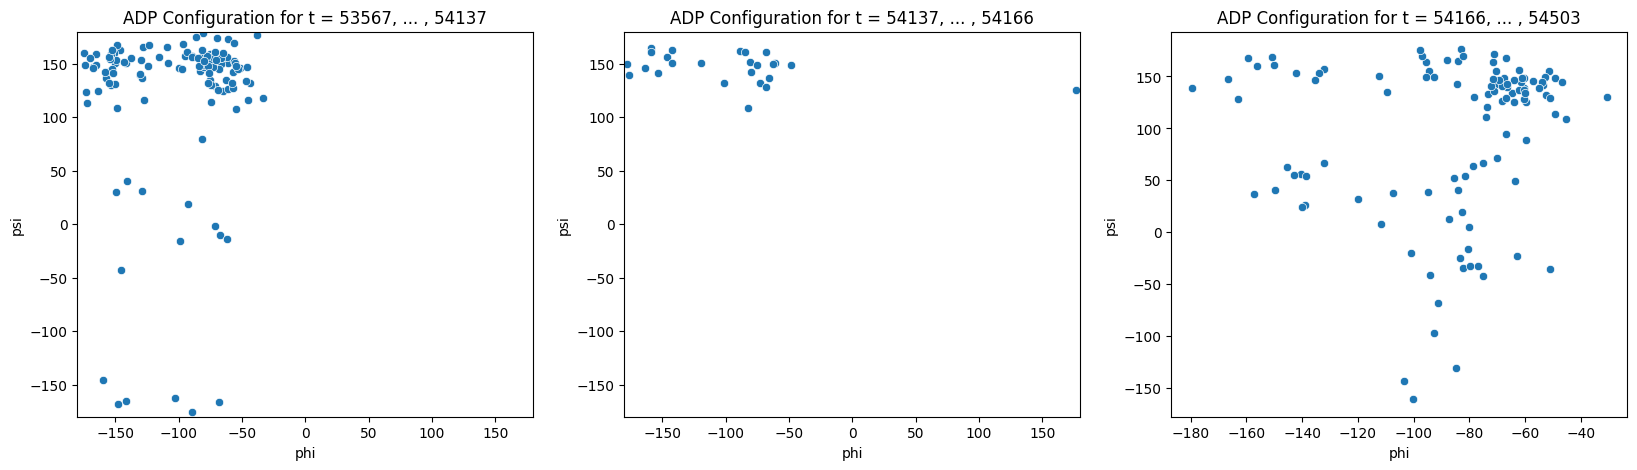

In [72]:
fig, (ax0, ax1, ax2) = plt.subplots(1,3)
fig.set_size_inches(20,5)
t = np.random.randint(len(filtered_cps) - 2)
ax0.set_xlim(-180,180)
ax1.set_xlim(-180,180)
ax0.set_ylim(-180,180)
ax1.set_ylim(-180,180)
ax0.set_title(f"ADP Configuration for t = {t0}, ... , {t1}")
ax1.set_title(f"ADP Configuration for t = {t1}, ... , {t2}")
ax2.set_title(f"ADP Configuration for t = {t2}, ... , {t3}")
t0, t1, t2, t3= filtered_cps[t], filtered_cps[t+1], filtered_cps[t+2], filtered_cps[t+3]
s0 = raw_angles[t0:t1]
s1 = raw_angles[t1:t2]
s2 = raw_angles[t2:t3]
sns.scatterplot(data=s0, x='phi', y='psi', ax=ax0)
sns.scatterplot(data=s1, x='phi', y='psi', ax=ax1)
sns.scatterplot(data=s2, x='phi', y='psi', ax=ax2)

TypeError: object of type 'NoneType' has no len()

<Figure size 640x480 with 0 Axes>

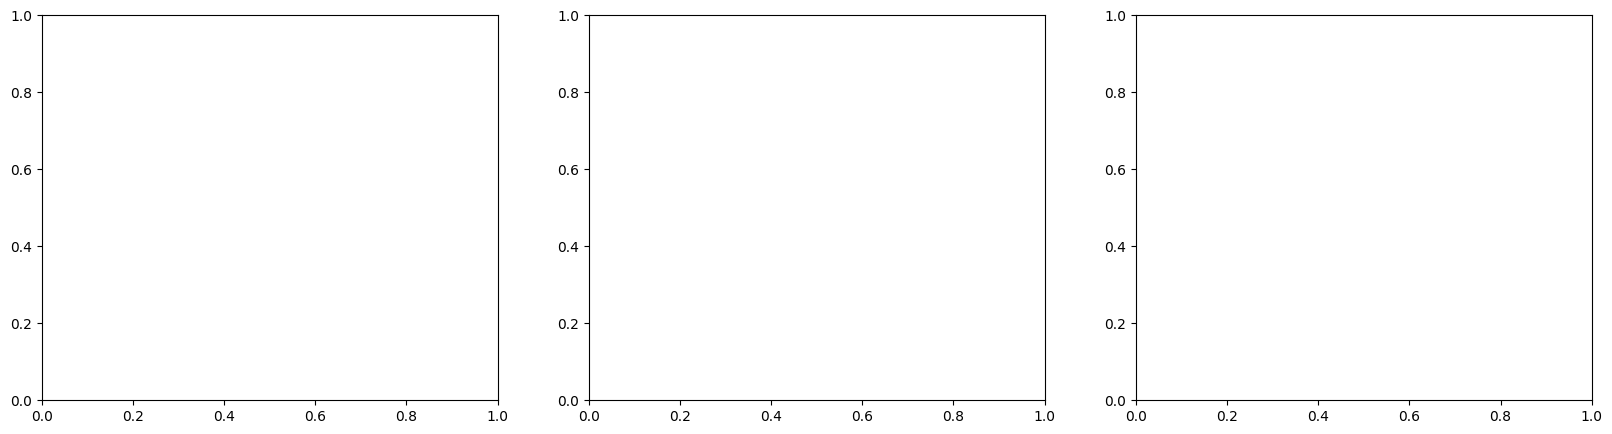

TypeError: object of type 'NoneType' has no len()

In [66]:
import matplotlib.animation as animation
plt.clf()
fig, (ax0, ax1, ax2) = plt.subplots(1,3)
fig.set_size_inches(20,5)
def update(frame):
    ax0.clear()
    ax1.clear()
    ax2.clear()
    t = frame
    t0, t1, t2, t3= filtered_cps[t], filtered_cps[t+1], filtered_cps[t+2], filtered_cps[t+3]
    if t1 < t0 or t2< t1 or t3 < t2:
        raise Exception
    s0 = raw_angles[t0:t1]
    s1 = raw_angles[t1:t2]
    s2 = raw_angles[t2:t3]
    sns.scatterplot(data=s0, x='phi', y='psi', ax=ax0)
    sns.scatterplot(data=s1, x='phi', y='psi', ax=ax1)
    ax0.set_xlim(-180,180)
    ax1.set_xlim(-180,180)
    ax2.set_xlim(-180,180)
    ax0.set_ylim(-180,180)
    ax1.set_ylim(-180,180)
    ax2.set_ylim(-180,180)
    ax0.set_title(f"ADP Configuration for t = {t0}, ... , {t1}")
    ax1.set_title(f"ADP Configuration for t = {t1}, ... , {t2}")
    ax2.set_title(f"ADP Configuration for t = {t2}, ... , {t3}")
    sns.scatterplot(data=s2, x='phi', y='psi', ax=ax2)
ani = animation.FuncAnimation(fig=fig, func=update, frames=len(filtered_cps) - 3, interval=250)
ani.save("moving_rama.mp4", writer='ffmpeg')

<Figure size 640x480 with 0 Axes>

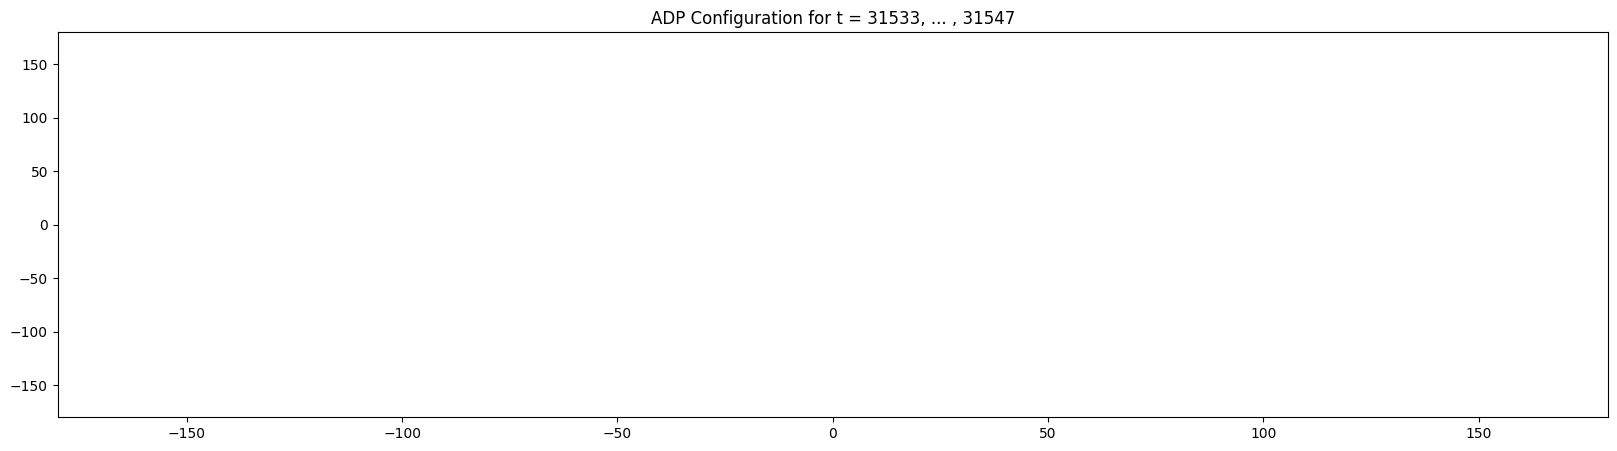

In [78]:
plt.clf()
fig, ax0= plt.subplots()
fig.set_size_inches(20,5)
def update(frame):
    ax0.clear()
    t = frame
    s0 = raw_angles[0:t]
    sns.scatterplot(data=s0, x='phi', y='psi', ax=ax0)
    ax0.set_xlim(-180,180)
    ax0.set_ylim(-180,180)
    ax0.set_title(f"ADP Configuration for t = {t0}, ... , {t1}")
ani = animation.FuncAnimation(fig=fig, func=update, frames=1000, interval=50)
ani.save("baseline_moving_rama.mp4", writer='ffmpeg')

In [77]:
indices = [np.random.randint(len(filtered_cps)) for _ in range(100)]
print(indices)
for i in indices: 
    plt.clf()
    fig, (ax0, ax1) = plt.subplots(1,2)
    #fig, (ax0, ax1, ax2) = plt.subplots(1,3)
    fig.set_size_inches(20,5)
    ax0.clear()
    ax1.clear()
    #ax2.clear()
    t = i
    t0, t1, t2, t3= filtered_cps[t], filtered_cps[t+1], filtered_cps[t+2], filtered_cps[t+3]
    s0 = raw_angles[t0-w:t0]
    s1 = raw_angles[t0:t0+w]
    sns.scatterplot(data=s0, x='phi', y='psi', ax=ax0)
    sns.scatterplot(data=s1, x='phi', y='psi', ax=ax1)
    ax0.set_xlim(-180,180)
    ax0.set_ylim(-180,180)
    ax0.set_title(f"ADP Configuration for t = {t0-w}, ... , {t0}")
    ax1.set_xlim(-180,180)
    ax1.set_ylim(-180,180)
    ax1.set_title(f"ADP Configuration for t = {t0}, ... , {t0+w}")
    #s2 = raw_angles[t2:t3]
    #ax2.set_title(f"ADP Configuration for t = {t2}, ... , {t3}")
    #ax2.set_xlim(-180,180)
    #ax2.set_ylim(-180,180)
    sns.scatterplot(data=s2, x='phi', y='psi', ax=ax2)
    plt.savefig(f"./img/adp_2d_cp_{t0}_{t3}.pdf")
    plt.close()

[227, 554, 3756, 6500, 3098, 4491, 2205, 3541, 3782, 804, 5727, 5141, 4291, 1068, 1207, 3561, 2076, 5229, 3978, 664, 5699, 2816, 1751, 2565, 4304, 2906, 3024, 1728, 4488, 3236, 5078, 2933, 4833, 4848, 4732, 5107, 1218, 543, 4528, 4616, 401, 3181, 5089, 5164, 1338, 3991, 2527, 2620, 1349, 168, 5480, 1442, 5922, 404, 3624, 3245, 2019, 2951, 343, 825, 6761, 543, 2515, 3880, 4864, 1103, 1200, 4970, 6461, 2645, 3174, 3271, 5339, 4235, 4727, 289, 6547, 6706, 2409, 3678, 1799, 6068, 5571, 4441, 2730, 2209, 5628, 6618, 3997, 233, 2344, 1766, 4090, 2291, 1441, 5295, 2910, 4140, 4355, 1054]


<Figure size 640x480 with 0 Axes>

In [36]:
# cluster the distributions

In [ ]:
# form the markov model and output it's steady state

In [ ]:
def markov_model_from_ints(arr):
    # given a list of integers representing a sequence of states,
    # return a Markov matrix modeling the state trajectory
    # num_nodes = unique(arr)
    # adjacency_matrix = np.zeros((num_nodes, num_nodes))
    # for k in range(len(arr) - 1):
    #     i = arr[k]
    #     j = arr[k + 1]
    #     adjacency_matrix[i,j] = 1 # the adjacency matrix will be oriented
    # markov_matrix = normalize_matrix_rows(adjacency_matrix)
    # return markov_matrix
    pass

def compute_markov_steady_state(markov_matrix):
    # some linear algebra
    # return p
    pass


In [ ]:
# graphics: for each cluster, subset the input data and output a ramachandran plot 